## Hovmöller plot of ssh along the coast

Run with 60 sec timestep and targetResidual=1E-13

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from scipy import signal
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
def create_nc_file(dist_array, time_array, curtain_data, filename,
                   title, description, units='m', name='SSH'):
    
    """ This function creates a netCDF4 file for
    the curtain plot data given the filename. 
    
    :arg dist_array: np 2D array, distance from bay array from meshgrid
    :arg time_array: np 2D array, time array from meshgrid
    :arg curtain_data: np 2D array of data to plot in curtain hovmöller. Size is (len(dist_array),len(time_array))
    :arg filename: str, Directory and name of netcdf file
    :arg title: str, title of plot
    :arg description: str, Details about the data
    """
    dataset = Dataset(filename, 'w')
    file_x = dataset.createDimension('x', curtain_data.shape[1])
    file_t = dataset.createDimension('t', curtain_data.shape[0])

    file_X = dataset.createVariable('X', 'f8', ('x'))
    file_T = dataset.createVariable('T', 'f8', ('t'))
    curt_data = dataset.createVariable('curtain_data', 'f8', ('t','x'))

    dataset.title = title
    dataset.author = 'Karina Ramos Musalem'
    dataset.institution = 'ICACC-UNAM'
    dataset.source = '/notebooks/MITgcm/domain5/ssh_hovmoller_at_coast_all_points.ipynb'
    dataset.description = description
    dataset.timeStamp = time.ctime(time.time())
    file_X.standard_name = 'Distance along the coast from SVB'
    file_X.units = 'km'
    file_T.standard_name = 'time'
    file_T.units = 's'
    curt_data.standard_name = name
    curt_data.units = units
    
    file_X[:] = dist_array[:]
    file_T[:] = time_array[:]
    curt_data[:] = curtain_data[:]

    dataset.close()

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/11_SVB_thresh/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/11_noSVB_thresh/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [4]:
nx = 512
ny = 612
nz = 100
nt = 720 #(output every 2 min for 24 hours)

In [5]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
times = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

In [6]:
df = pd.read_csv('coastline_points_list.txt',names=['lon_ii','lat_jj'], header=1 )

0, 397 221 Depth at cell is 4.00 m
1, 397 222 Depth at cell is 4.00 m
2, 397 223 Depth at cell is 6.00 m
3, 397 224 Depth at cell is 6.00 m
4, 397 225 Depth at cell is 8.00 m
5, 397 226 Depth at cell is 6.00 m
6, 398 226 Depth at cell is 0.00 m
7, 398 228 Depth at cell is 4.00 m
8, 397 229 Depth at cell is 20.00 m
9, 397 230 Depth at cell is 10.00 m
10, 396 231 Depth at cell is 26.20 m
11, 396 232 Depth at cell is 20.00 m
12, 397 233 Depth at cell is 2.00 m
13, 397 234 Depth at cell is 4.00 m
14, 397 235 Depth at cell is 4.00 m
15, 397 236 Depth at cell is 4.00 m
16, 397 237 Depth at cell is 4.00 m
17, 397 238 Depth at cell is 6.00 m
18, 397 239 Depth at cell is 4.00 m
19, 396 240 Depth at cell is 17.20 m
20, 396 241 Depth at cell is 12.20 m
21, 396 242 Depth at cell is 6.00 m
22, 395 243 Depth at cell is 14.60 m
23, 395 244 Depth at cell is 12.20 m
24, 395 245 Depth at cell is 8.00 m
25, 394 246 Depth at cell is 17.20 m
26, 393 247 Depth at cell is 17.20 m
27, 392 248 Depth at cell is

221, 311 418 Depth at cell is 2.00 m
222, 311 419 Depth at cell is 6.00 m
223, 310 420 Depth at cell is 6.00 m
224, 309 421 Depth at cell is 6.00 m
225, 303 422 Depth at cell is 14.60 m
226, 305 422 Depth at cell is 2.00 m
227, 306 422 Depth at cell is 8.00 m
228, 307 422 Depth at cell is 8.00 m
229, 308 422 Depth at cell is 8.00 m
230, 303 423 Depth at cell is 14.60 m
231, 303 424 Depth at cell is 14.60 m
232, 303 425 Depth at cell is 14.60 m
233, 303 426 Depth at cell is 14.60 m
234, 303 427 Depth at cell is 12.20 m
235, 302 428 Depth at cell is 20.00 m
236, 302 429 Depth at cell is 10.00 m
237, 302 430 Depth at cell is 6.00 m
238, 304 430 Depth at cell is 0.00 m
239, 304 432 Depth at cell is 4.00 m
240, 304 433 Depth at cell is 8.00 m
241, 304 434 Depth at cell is 6.00 m
242, 303 435 Depth at cell is 33.50 m
243, 303 436 Depth at cell is 17.20 m
244, 303 437 Depth at cell is 14.60 m
245, 303 438 Depth at cell is 10.00 m
246, 303 439 Depth at cell is 4.00 m
247, 303 440 Depth at cell

440, 148 547 Depth at cell is 2.00 m
441, 149 547 Depth at cell is 8.00 m
442, 150 547 Depth at cell is 6.00 m
443, 151 547 Depth at cell is 4.00 m
444, 152 547 Depth at cell is 4.00 m
445, 153 547 Depth at cell is 6.00 m
446, 154 547 Depth at cell is 4.00 m
447, 130 548 Depth at cell is 33.50 m
448, 131 548 Depth at cell is 17.20 m
449, 132 548 Depth at cell is 10.00 m
450, 100 549 Depth at cell is 23.00 m
451, 101 549 Depth at cell is 20.00 m
452, 128 549 Depth at cell is 33.50 m
453, 129 549 Depth at cell is 20.00 m
454, 98 550 Depth at cell is 8.00 m
455, 99 550 Depth at cell is 4.00 m
456, 102 550 Depth at cell is 2.00 m
457, 103 550 Depth at cell is 4.00 m
458, 104 550 Depth at cell is 4.00 m
459, 105 550 Depth at cell is 6.00 m
460, 106 550 Depth at cell is 8.00 m
461, 110 550 Depth at cell is 20.00 m
462, 122 550 Depth at cell is 26.20 m
463, 124 550 Depth at cell is 23.00 m
464, 125 550 Depth at cell is 20.00 m
465, 126 550 Depth at cell is 14.60 m
466, 127 550 Depth at cell i

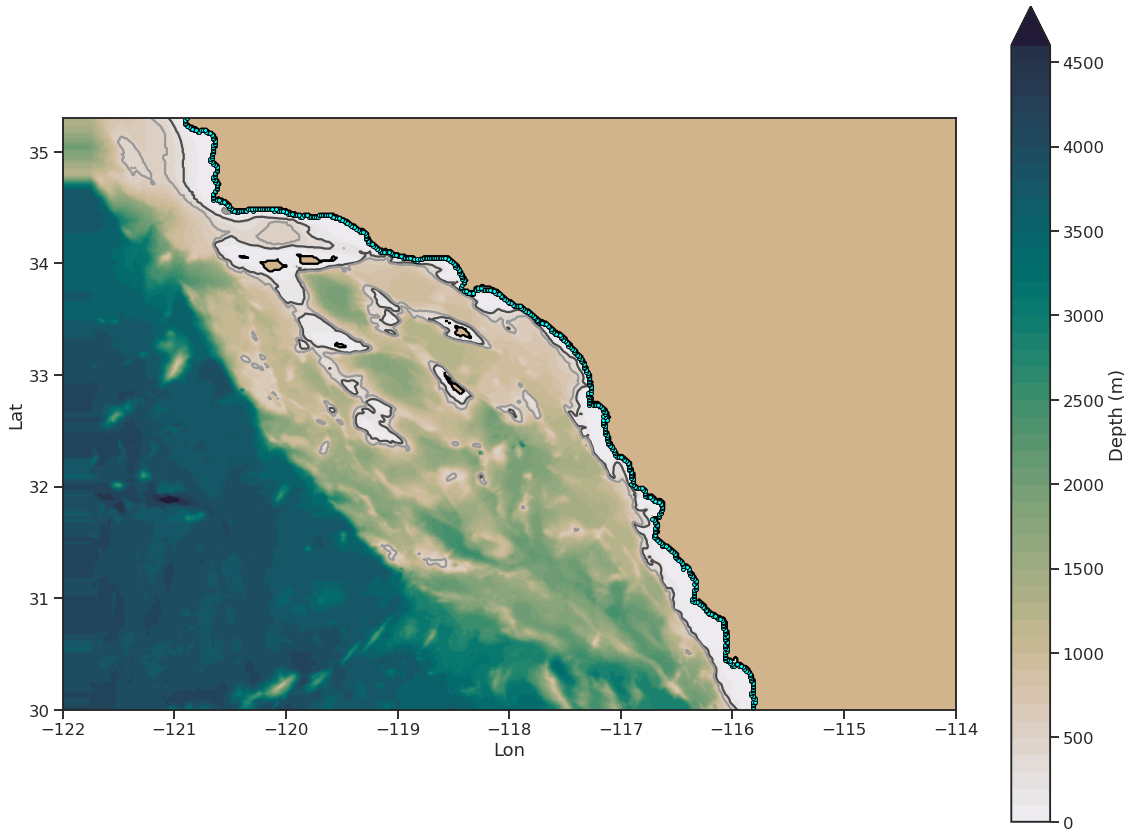

In [7]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,mm in zip(df.lon_ii[:], df.lat_jj[:], range(len(df.lat_jj))):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1],LAT[int(jj)-1,0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    print('%d, %d %d Depth at cell is %1.2f m' % (mm,int(ii),int(jj),depth[jj-1,ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

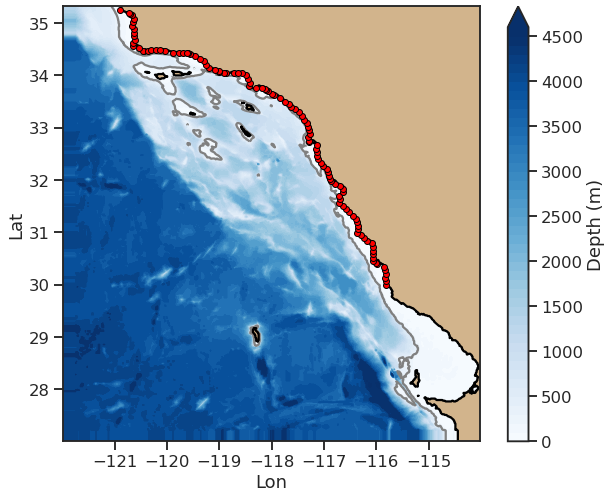

In [8]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=4500, cmap='Blues', extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.5'], 
                levels=[250])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(df.lon_ii[::5], df.lat_jj[::5]):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1],LAT[int(jj)-1,0],'o', 
            markersize=6, color='red', markeredgecolor='k')
cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
#ax.set_xlim(238-360, 246-360)
#ax.set_ylim(30,35.3)
ax.set_aspect(1)

### Hovmöller 

In [9]:
lon_ii = np.array(df.lon_ii[:])-np.ones_like(df.lon_ii)
lat_jj = np.array(df.lat_jj[:])-np.ones_like(df.lat_jj)

In [10]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [11]:
dist_array = np.zeros(len(lon_ii))

for kk in range(1,len(lon_ii)):
    lat1 = lat[lat_jj[kk-1]]
    lon1 = lon[lon_ii[kk-1]]
    lat2 = lat[lat_jj[kk]]
    lon2 = lon[lon_ii[kk]]
    dist_array[kk]=  distance(lat1, lon1, lat2, lon2)

In [12]:
dist_cummul = np.cumsum(dist_array)

In [13]:
times = np.arange(720)*120 # 120 sec = 2 min

101.2
313.7
493.7
659.9
903.4
1231.4
1491.3


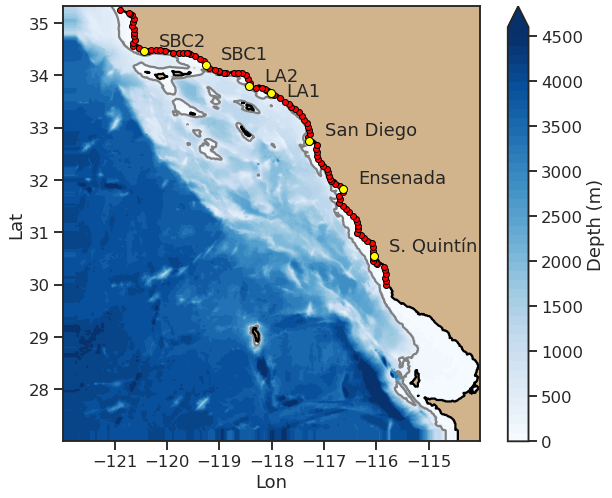

In [14]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=4500, cmap='Blues', extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.5'], 
                levels=[250])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[::5], lat_jj[::5],range(0,len(lon_ii),5)):
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=6, color='red', markeredgecolor='k')
    
for kk, lab in zip([47,150,230,307,335,400,450], ['S. Quintín', 'Ensenada','San Diego','LA1','LA2','SBC1','SBC2']):
    #print(ii,jj)
    ii = int(lon_ii[kk])
    jj = int(lat_jj[kk])
    ax.plot(LON[0,ii],LAT[jj,0],'o', 
            markersize=8, color='yellow', markeredgecolor='k')
    if lab == 'LA1':
        ax.text(LON[0,ii]+0.3,LAT[jj,0]-0.05, lab)
    else:
        ax.text(LON[0,ii]+0.3,LAT[jj,0]+0.1, lab)
        
    print('%1.1f' %dist_cummul[kk])
    
cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
#ax.set_xlim(238-360, 246-360)
#ax.set_ylim(30,35.3)
ax.set_aspect(1)

In [15]:
# This cell takes a while (about 10 min), that is why I save the data in next cell
ssh = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh[:,kk] = ds['ETAN'][:,jj,ii]

In [16]:
filename = 'curtain_SSH_SVB_febTS_threshRes.nc'
description = 'SSH data at points along the coast to build curtain hovmöller plot (run11, cg2dtargetResidual=1E-13)'
title = 'SSH curtain plot data febTS SVB with run11, cg2dtargetResidual=1E-13 (24 hours)'

create_nc_file(dist_cummul, times, ssh, filename,
               title, description, units='m', name='SSH')

Text(0.5, 1.0, 'SVB run')

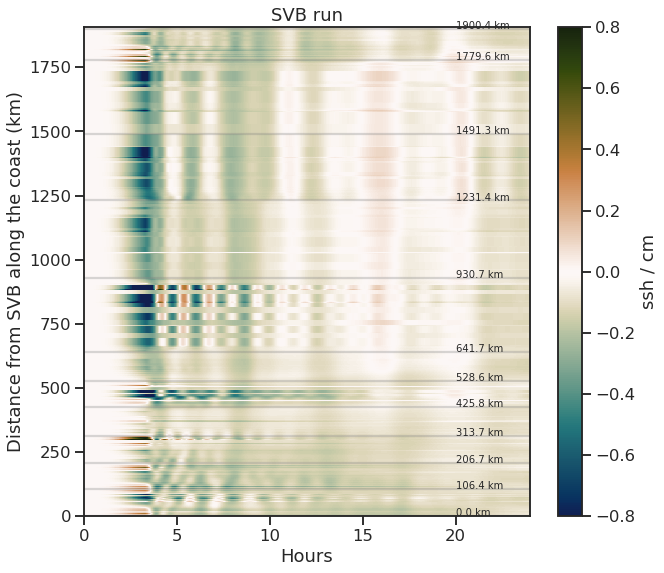

In [17]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB run')

## No SVB run

In [18]:
# This cell takes a while (about 10 min)
ssh_NOB = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh_NOB[:,kk] = ds2['ETAN'][:,jj,ii]

In [19]:
filename2 = 'curtain_SSH_NoSVB_febTS_threshRes.nc'
description2 = 'SSH data at points along the coast to build curtain hovmöller plot for no SVB run run11, cg2dtargetResidual=1E-13 for 24 hours'
title2 = 'SSH curtain plot data febTS NO SVB run11, cg2dtargetResidual=1E-13 for 24 hours'

create_nc_file(dist_cummul, times, ssh_NOB, filename2,
               title2, description2, units='m', name='SSH')

Text(0.5, 1.0, 'No SVB run')

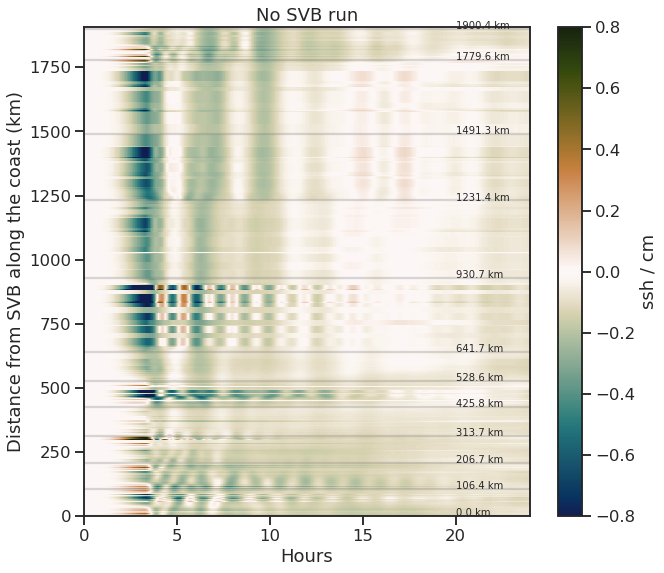

In [20]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')

# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.3)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('No SVB run')

## Bay minus no Bay 

Text(0.5, 1.0, 'SVB-No SVB')

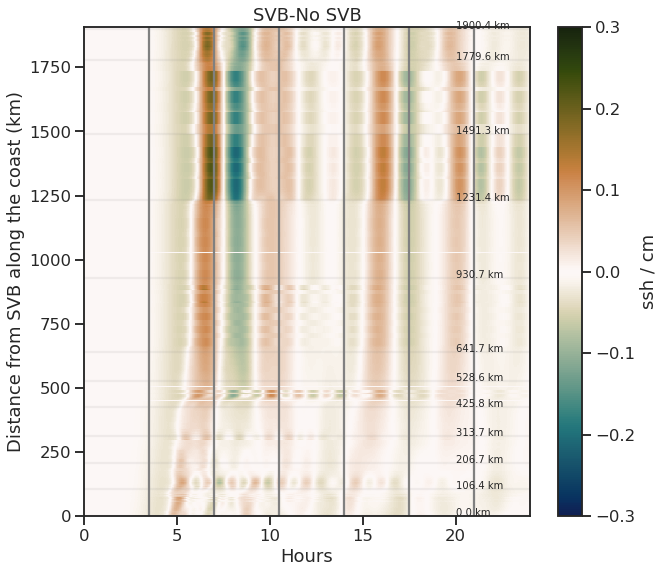

In [21]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(times/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.1)
        ax.text(20,dist_cummul[kk],'%1.1f km' %dist_cummul[kk], fontsize=10)

for hr in [3.5,7,10.5,14,17.5,21]:
    ax.axvline(hr, color='0.5')
#ax.plot(5,0,'ko')
#ax.plot(6.6,700, 'ko')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

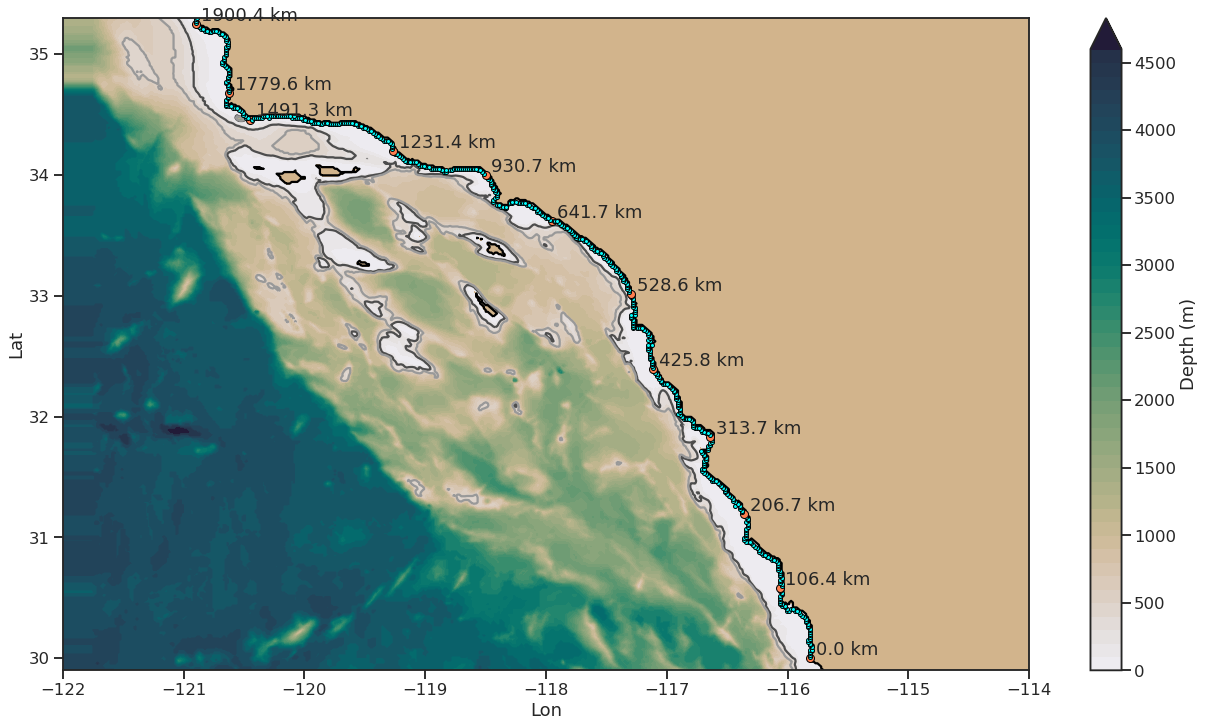

In [22]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(22,12))
ax.set_facecolor('tan')
pc = ax.contourf(lon,lat,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[:], lat_jj[:],range(len(lon_ii))):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    if kk%50 == 0:
        ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
                markersize=8, color='coral', markeredgecolor='k')
        ax.text(LON[0,int(ii)+3],LAT[int(jj)+2,0],'%1.1f km' %dist_cummul[kk])

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(29.9,35.3)
ax.set_aspect(1)

### Timeseries

(-0.18, 0.18)

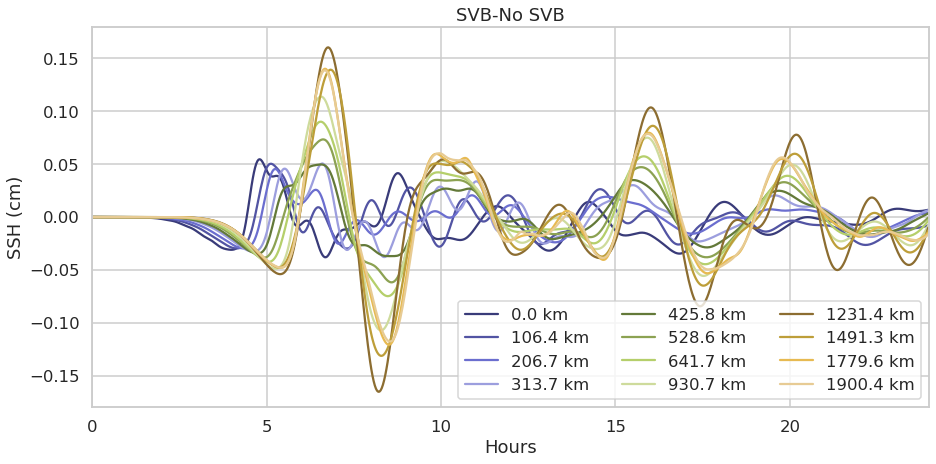

In [23]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('tab20b',n_colors=20)
fig, ax = plt.subplots(1,1,figsize=(15,7))

# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.plot(times[:]/3600,(ssh[:,kk]-ssh_NOB[:,kk])*100, label='%1.1f km' %dist_cummul[kk])

ax.set_ylabel('SSH (cm)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')
ax.set_xlim(0,24)
ax.legend(ncol=3)
ax.set_ylim(-0.18,0.18)

In [24]:
import xarray as xr

In [29]:
ssh_febTS2 = xr.open_dataset('curtain_SSH_SVB_febTS.nc')
ssh_febTS_NoB2 = xr.open_dataset('curtain_SSH_NoSVB_febTS.nc')
X_ssh2 = ssh_febTS2.X
T_ssh2 = ssh_febTS2.T

ssh_febTS = xr.open_dataset('curtain_SSH_SVB_febTS_threshRes.nc')
ssh_febTS_NoB = xr.open_dataset('curtain_SSH_NoSVB_febTS_threshRes.nc')
X_ssh = ssh_febTS.X
T_ssh = ssh_febTS.T


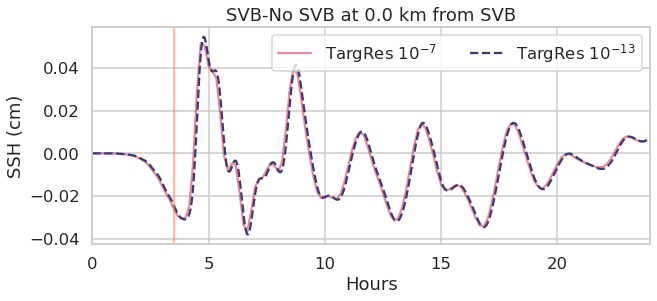

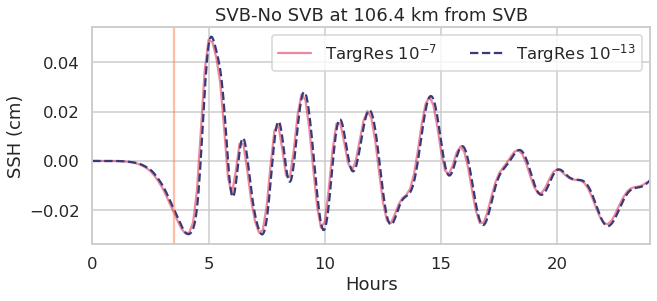

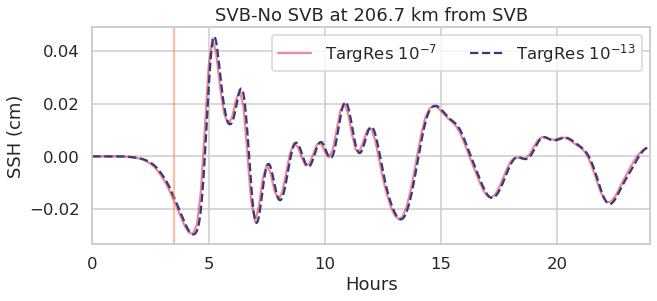

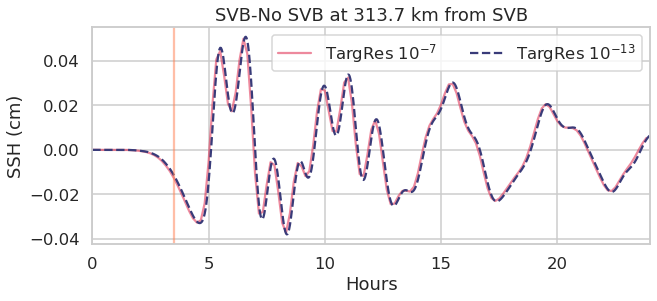

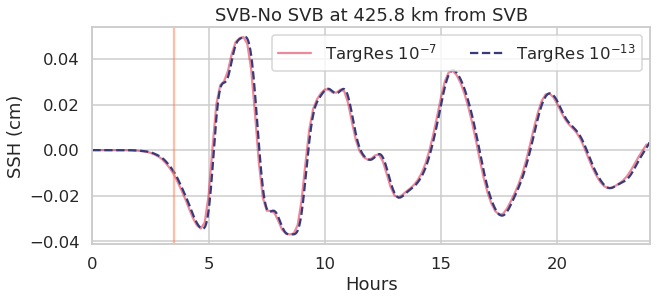

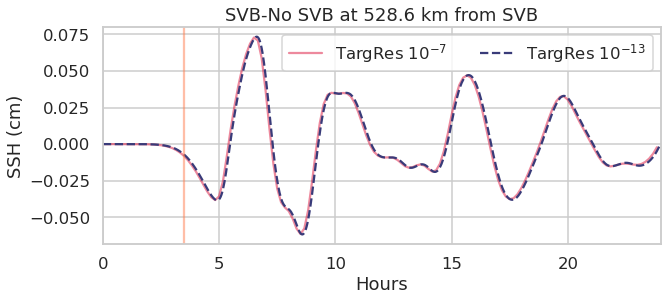

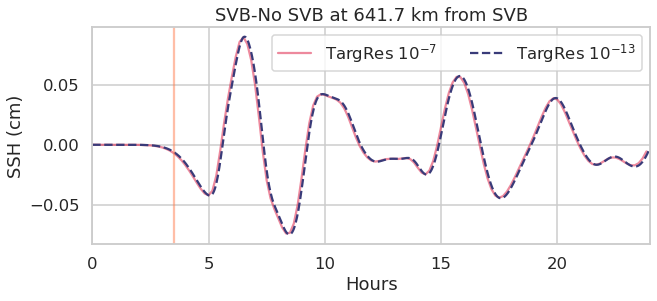

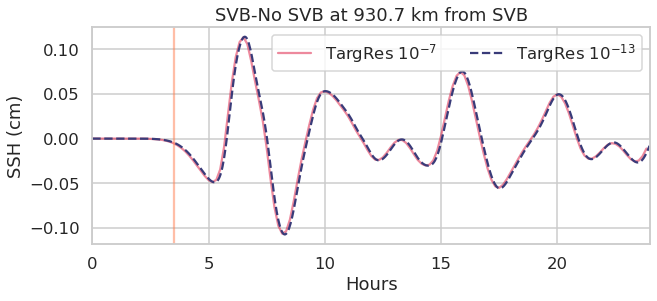

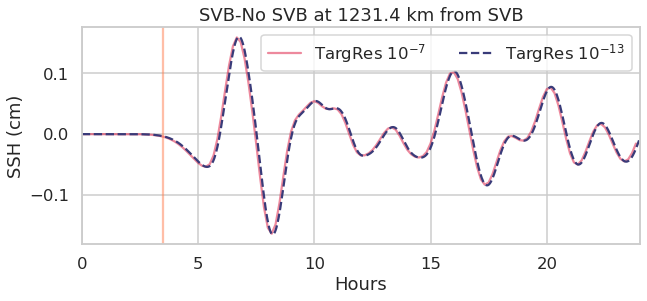

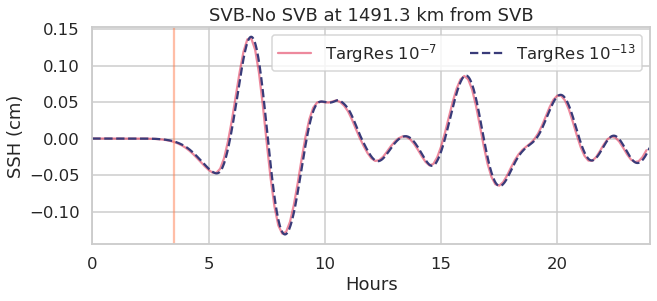

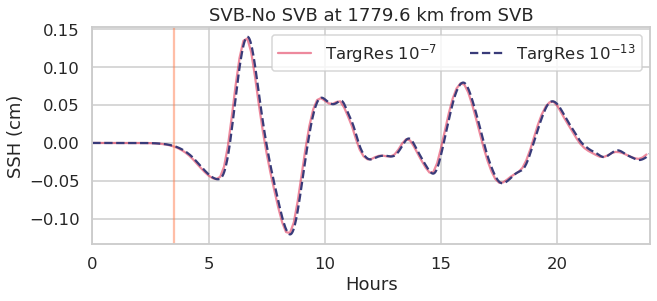

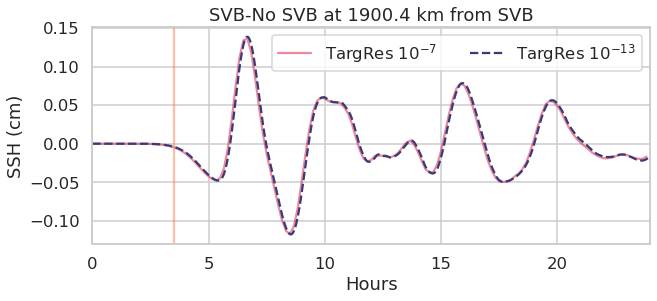

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('tab20b',n_colors=20)

# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        fig, ax = plt.subplots(1,1,figsize=(10,4))
        ax.plot(T_ssh2[:144]/3600,(ssh_febTS2.curtain_data[:144,kk]-ssh_febTS_NoB2.curtain_data[:144,kk])*100,color='crimson',
                label='TargRes 10$^{-7}$', alpha=0.5)
        ax.plot(T_ssh[:]/3600,(ssh_febTS.curtain_data[:,kk]-ssh_febTS_NoB.curtain_data[:,kk])*100,'--', 
                label='TargRes 10$^{-13}$')

    ax.set_ylabel('SSH (cm)')
    ax.set_xlabel('Hours')
    ax.set_title('SVB-No SVB at %1.1f km from SVB' %dist_cummul[kk])
    ax.set_xlim(0,24)
    ax.legend(ncol=3)
    ax.axvline(3.5, color='coral', alpha=0.5)
    plt.show()